Example taken from https://scipython.com/blog/processing-uk-ordnance-survey-terrain-data/

# Processing UK Ordnance Survey terrain data

The UK's [Ordnance Survey](https://www.ordnancesurvey.co.uk/) mapping agency now makes its 50 m resolution elevation data freely-available through its online [OpenData download service](https://osdatahub.os.uk). This article uses Python, NumPy and Matplotlib to process and visualize these data without using a specialized GIS library.

We will download data from the [OS Terrain® 50](https://osdatahub.os.uk/downloads/open/Terrain50) data set. On that page select ASCII Grid and GML (Grid), download the archive `terr50_gagg_gb.zip` and upload it to Colab. Unzip it with

In [ ]:
! unzip terr50_gagg_gb.zip

This unzipped archive contains further zipped data files containing .asc files named XX##.asc where XX is a two-letter code identifying each 100 km × 100 km grid sq of the OS map and ## identifies the 10 km × 10 km grid squares within this larger square. For more on the OS grid system, see this Beginner's Guide.

From within `terr50_gagg_gb`, unzip all the files with

In [2]:
! cd terr50_gagg_gb; find . -name "*.zip" -exec unzip '{}' ';'

Archive:  ./terr50_gagg_gb/data/sk/sk62_OST50GRID_20200303.zip
  inflating: SK62.asc                
  inflating: SK62.gml                
  inflating: SK62.prj                
  inflating: Metadata_SK62.xml       
  inflating: SK62.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sk/sk17_OST50GRID_20200303.zip
  inflating: SK17.asc                
  inflating: SK17.gml                
  inflating: SK17.prj                
  inflating: Metadata_SK17.xml       
  inflating: SK17.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sk/sk68_OST50GRID_20200303.zip
  inflating: SK68.asc                
  inflating: SK68.gml                
  inflating: SK68.prj                
  inflating: Metadata_SK68.xml       
  inflating: SK68.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sk/sk59_OST50GRID_20200303.zip
  inflating: SK59.asc                
  inflating: SK59.gml                
  inflating: SK59.prj                
  inflating: Metadata_SK59.xml       
  inflating: SK59.asc.aux.

  inflating: SK67.gml                
  inflating: SK67.prj                
  inflating: Metadata_SK67.xml       
  inflating: SK67.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sk/sk18_OST50GRID_20200303.zip
  inflating: SK18.asc                
  inflating: SK18.gml                
  inflating: SK18.prj                
  inflating: Metadata_SK18.xml       
  inflating: SK18.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sk/sk20_OST50GRID_20200303.zip
  inflating: SK20.asc                
  inflating: SK20.gml                
  inflating: SK20.prj                
  inflating: Metadata_SK20.xml       
  inflating: SK20.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sk/sk94_OST50GRID_20200303.zip
  inflating: SK94.asc                
  inflating: SK94.gml                
  inflating: SK94.prj                
  inflating: Metadata_SK94.xml       
  inflating: SK94.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sk/sk55_OST50GRID_20200303.zip
  inflating: SK55.asc     

Archive:  ./terr50_gagg_gb/data/sk/sk88_OST50GRID_20200303.zip
  inflating: SK88.asc                
  inflating: SK88.gml                
  inflating: SK88.prj                
  inflating: Metadata_SK88.xml       
  inflating: SK88.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sk/sk78_OST50GRID_20200303.zip
  inflating: SK78.asc                
  inflating: SK78.gml                
  inflating: SK78.prj                
  inflating: Metadata_SK78.xml       
  inflating: SK78.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sk/sk07_OST50GRID_20200303.zip
  inflating: SK07.asc                
  inflating: SK07.gml                
  inflating: SK07.prj                
  inflating: Metadata_SK07.xml       
  inflating: SK07.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sk/sk72_OST50GRID_20200303.zip
  inflating: SK72.asc                
  inflating: SK72.gml                
  inflating: SK72.prj                
  inflating: Metadata_SK72.xml       
  inflating: SK72.asc.aux.

  inflating: SE42.gml                
  inflating: SE42.prj                
  inflating: Metadata_SE42.xml       
  inflating: SE42.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/se/se89_OST50GRID_20200303.zip
  inflating: SE89.asc                
  inflating: SE89.gml                
  inflating: SE89.prj                
  inflating: Metadata_SE89.xml       
  inflating: SE89.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/se/se48_OST50GRID_20200303.zip
  inflating: SE48.asc                
  inflating: SE48.gml                
  inflating: SE48.prj                
  inflating: Metadata_SE48.xml       
  inflating: SE48.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/se/se74_OST50GRID_20200303.zip
  inflating: SE74.asc                
  inflating: SE74.gml                
  inflating: SE74.prj                
  inflating: Metadata_SE74.xml       
  inflating: SE74.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/se/se01_OST50GRID_20200303.zip
  inflating: SE01.asc     

Archive:  ./terr50_gagg_gb/data/se/se85_OST50GRID_20200303.zip
  inflating: SE85.asc                
  inflating: SE85.gml                
  inflating: SE85.prj                
  inflating: Metadata_SE85.xml       
  inflating: SE85.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/se/se75_OST50GRID_20200303.zip
  inflating: SE75.asc                
  inflating: SE75.gml                
  inflating: SE75.prj                
  inflating: Metadata_SE75.xml       
  inflating: SE75.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/se/se00_OST50GRID_20200303.zip
  inflating: SE00.asc                
  inflating: SE00.gml                
  inflating: SE00.prj                
  inflating: Metadata_SE00.xml       
  inflating: SE00.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/se/se49_OST50GRID_20200303.zip
  inflating: SE49.asc                
  inflating: SE49.gml                
  inflating: SE49.prj                
  inflating: Metadata_SE49.xml       
  inflating: SE49.asc.aux.

Archive:  ./terr50_gagg_gb/data/se/se63_OST50GRID_20200303.zip
  inflating: SE63.asc                
  inflating: SE63.gml                
  inflating: SE63.prj                
  inflating: Metadata_SE63.xml       
  inflating: SE63.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/se/se69_OST50GRID_20200303.zip
  inflating: SE69.asc                
  inflating: SE69.gml                
  inflating: SE69.prj                
  inflating: Metadata_SE69.xml       
  inflating: SE69.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/se/se68_OST50GRID_20200303.zip
  inflating: SE68.asc                
  inflating: SE68.gml                
  inflating: SE68.prj                
  inflating: Metadata_SE68.xml       
  inflating: SE68.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/se/se17_OST50GRID_20200303.zip
  inflating: SE17.asc                
  inflating: SE17.gml                
  inflating: SE17.prj                
  inflating: Metadata_SE17.xml       
  inflating: SE17.asc.aux.

Archive:  ./terr50_gagg_gb/data/sw/sw98_OST50GRID_20200303.zip
  inflating: SW98.asc                
  inflating: SW98.gml                
  inflating: SW98.prj                
  inflating: Metadata_SW98.xml       
  inflating: SW98.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sw/sw62_OST50GRID_20200303.zip
  inflating: SW62.asc                
  inflating: SW62.gml                
  inflating: SW62.prj                
  inflating: Metadata_SW62.xml       
  inflating: SW62.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sw/sw63_OST50GRID_20200303.zip
  inflating: SW63.asc                
  inflating: SW63.gml                
  inflating: SW63.prj                
  inflating: Metadata_SW63.xml       
  inflating: SW63.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sw/sw52_OST50GRID_20200303.zip
  inflating: SW52.asc                
  inflating: SW52.gml                
  inflating: SW52.prj                
  inflating: Metadata_SW52.xml       
  inflating: SW52.asc.aux.

  inflating: SP03.asc                
  inflating: SP03.gml                
  inflating: SP03.prj                
  inflating: Metadata_SP03.xml       
  inflating: SP03.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sp/sp76_OST50GRID_20200303.zip
  inflating: SP76.asc                
  inflating: SP76.gml                
  inflating: SP76.prj                
  inflating: Metadata_SP76.xml       
  inflating: SP76.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sp/sp31_OST50GRID_20200303.zip
  inflating: SP31.asc                
  inflating: SP31.gml                
  inflating: SP31.prj                
  inflating: Metadata_SP31.xml       
  inflating: SP31.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sp/sp44_OST50GRID_20200303.zip
  inflating: SP44.asc                
  inflating: SP44.gml                
  inflating: SP44.prj                
  inflating: Metadata_SP44.xml       
  inflating: SP44.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sp/sp85_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/sp/sp33_OST50GRID_20200303.zip
  inflating: SP33.asc                
  inflating: SP33.gml                
  inflating: SP33.prj                
  inflating: Metadata_SP33.xml       
  inflating: SP33.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sp/sp05_OST50GRID_20200303.zip
  inflating: SP05.asc                
  inflating: SP05.gml                
  inflating: SP05.prj                
  inflating: Metadata_SP05.xml       
  inflating: SP05.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sp/sp70_OST50GRID_20200303.zip
  inflating: SP70.asc                
  inflating: SP70.gml                
  inflating: SP70.prj                
  inflating: Metadata_SP70.xml       
  inflating: SP70.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sp/sp80_OST50GRID_20200303.zip
  inflating: SP80.asc                
  inflating: SP80.gml                
  inflating: SP80.prj                
  inflating: Metadata_SP80.xml       
  inflating: SP80.asc.aux.

Archive:  ./terr50_gagg_gb/data/sp/sp60_OST50GRID_20200303.zip
  inflating: SP60.asc                
  inflating: SP60.gml                
  inflating: SP60.prj                
  inflating: Metadata_SP60.xml       
  inflating: SP60.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sp/sp15_OST50GRID_20200303.zip
  inflating: SP15.asc                
  inflating: SP15.gml                
  inflating: SP15.prj                
  inflating: Metadata_SP15.xml       
  inflating: SP15.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sp/sp23_OST50GRID_20200303.zip
  inflating: SP23.asc                
  inflating: SP23.gml                
  inflating: SP23.prj                
  inflating: Metadata_SP23.xml       
  inflating: SP23.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sp/sp97_OST50GRID_20200303.zip
  inflating: SP97.asc                
  inflating: SP97.gml                
  inflating: SP97.prj                
  inflating: Metadata_SP97.xml       
  inflating: SP97.asc.aux.

Archive:  ./terr50_gagg_gb/data/sy/sy38_OST50GRID_20200303.zip
  inflating: SY38.asc                
  inflating: SY38.gml                
  inflating: SY38.prj                
  inflating: Metadata_SY38.xml       
  inflating: SY38.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sy/sy69_OST50GRID_20200303.zip
  inflating: SY69.asc                
  inflating: SY69.gml                
  inflating: SY69.prj                
  inflating: Metadata_SY69.xml       
  inflating: SY69.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sy/sy58_OST50GRID_20200303.zip
  inflating: SY58.asc                
  inflating: SY58.gml                
  inflating: SY58.prj                
  inflating: Metadata_SY58.xml       
  inflating: SY58.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sy/sy99_OST50GRID_20200303.zip
  inflating: SY99.asc                
  inflating: SY99.gml                
  inflating: SY99.prj                
  inflating: Metadata_SY99.xml       
  inflating: SY99.asc.aux.

Archive:  ./terr50_gagg_gb/data/sd/sd33_OST50GRID_20200303.zip
  inflating: SD33.asc                
  inflating: SD33.gml                
  inflating: SD33.prj                
  inflating: Metadata_SD33.xml       
  inflating: SD33.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sd/sd87_OST50GRID_20200303.zip
  inflating: SD87.asc                
  inflating: SD87.gml                
  inflating: SD87.prj                
  inflating: Metadata_SD87.xml       
  inflating: SD87.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sd/sd46_OST50GRID_20200303.zip
  inflating: SD46.asc                
  inflating: SD46.gml                
  inflating: SD46.prj                
  inflating: Metadata_SD46.xml       
  inflating: SD46.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sd/sd39_OST50GRID_20200303.zip
  inflating: SD39.asc                
  inflating: SD39.gml                
  inflating: SD39.prj                
  inflating: Metadata_SD39.xml       
  inflating: SD39.asc.aux.

  inflating: SD92.asc                
  inflating: SD92.gml                
  inflating: SD92.prj                
  inflating: Metadata_SD92.xml       
  inflating: SD92.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sd/sd62_OST50GRID_20200303.zip
  inflating: SD62.asc                
  inflating: SD62.gml                
  inflating: SD62.prj                
  inflating: Metadata_SD62.xml       
  inflating: SD62.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sd/sd17_OST50GRID_20200303.zip
  inflating: SD17.asc                
  inflating: SD17.gml                
  inflating: SD17.prj                
  inflating: Metadata_SD17.xml       
  inflating: SD17.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sd/sd68_OST50GRID_20200303.zip
  inflating: SD68.asc                
  inflating: SD68.gml                
  inflating: SD68.prj                
  inflating: Metadata_SD68.xml       
  inflating: SD68.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sd/sd21_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/sj/sj69_OST50GRID_20200303.zip
  inflating: SJ69.asc                
  inflating: SJ69.gml                
  inflating: SJ69.prj                
  inflating: Metadata_SJ69.xml       
  inflating: SJ69.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sj/sj99_OST50GRID_20200303.zip
  inflating: SJ99.asc                
  inflating: SJ99.gml                
  inflating: SJ99.prj                
  inflating: Metadata_SJ99.xml       
  inflating: SJ99.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sj/sj58_OST50GRID_20200303.zip
  inflating: SJ58.asc                
  inflating: SJ58.gml                
  inflating: SJ58.prj                
  inflating: Metadata_SJ58.xml       
  inflating: SJ58.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sj/sj93_OST50GRID_20200303.zip
  inflating: SJ93.asc                
  inflating: SJ93.gml                
  inflating: SJ93.prj                
  inflating: Metadata_SJ93.xml       
  inflating: SJ93.asc.aux.

  inflating: SJ59.asc                
  inflating: SJ59.gml                
  inflating: SJ59.prj                
  inflating: Metadata_SJ59.xml       
  inflating: SJ59.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sj/sj98_OST50GRID_20200303.zip
  inflating: SJ98.asc                
  inflating: SJ98.gml                
  inflating: SJ98.prj                
  inflating: Metadata_SJ98.xml       
  inflating: SJ98.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sj/sj68_OST50GRID_20200303.zip
  inflating: SJ68.asc                
  inflating: SJ68.gml                
  inflating: SJ68.prj                
  inflating: Metadata_SJ68.xml       
  inflating: SJ68.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sj/sj17_OST50GRID_20200303.zip
  inflating: SJ17.asc                
  inflating: SJ17.gml                
  inflating: SJ17.prj                
  inflating: Metadata_SJ17.xml       
  inflating: SJ17.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sj/sj62_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/sj/sj00_OST50GRID_20200303.zip
  inflating: SJ00.asc                
  inflating: SJ00.gml                
  inflating: SJ00.prj                
  inflating: Metadata_SJ00.xml       
  inflating: SJ00.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sj/sj31_OST50GRID_20200303.zip
  inflating: SJ31.asc                
  inflating: SJ31.gml                
  inflating: SJ31.prj                
  inflating: Metadata_SJ31.xml       
  inflating: SJ31.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sj/sj44_OST50GRID_20200303.zip
  inflating: SJ44.asc                
  inflating: SJ44.gml                
  inflating: SJ44.prj                
  inflating: Metadata_SJ44.xml       
  inflating: SJ44.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sj/sj85_OST50GRID_20200303.zip
  inflating: SJ85.asc                
  inflating: SJ85.gml                
  inflating: SJ85.prj                
  inflating: Metadata_SJ85.xml       
  inflating: SJ85.asc.aux.

Archive:  ./terr50_gagg_gb/data/sm/sm92_OST50GRID_20200303.zip
  inflating: SM92.asc                
  inflating: SM92.gml                
  inflating: SM92.prj                
  inflating: Metadata_SM92.xml       
  inflating: SM92.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sm/sm91_OST50GRID_20200303.zip
  inflating: SM91.asc                
  inflating: SM91.gml                
  inflating: SM91.prj                
  inflating: Metadata_SM91.xml       
  inflating: SM91.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sm/sm50_OST50GRID_20200303.zip
  inflating: SM50.asc                
  inflating: SM50.gml                
  inflating: SM50.prj                
  inflating: Metadata_SM50.xml       
  inflating: SM50.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sx/sx86_OST50GRID_20200303.zip
  inflating: SX86.asc                
  inflating: SX86.gml                
  inflating: SX86.prj                
  inflating: Metadata_SX86.xml       
  inflating: SX86.asc.aux.

Archive:  ./terr50_gagg_gb/data/sx/sx33_OST50GRID_20200303.zip
  inflating: SX33.asc                
  inflating: SX33.gml                
  inflating: SX33.prj                
  inflating: Metadata_SX33.xml       
  inflating: SX33.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sx/sx46_OST50GRID_20200303.zip
  inflating: SX46.asc                
  inflating: SX46.gml                
  inflating: SX46.prj                
  inflating: Metadata_SX46.xml       
  inflating: SX46.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sx/sx87_OST50GRID_20200303.zip
  inflating: SX87.asc                
  inflating: SX87.gml                
  inflating: SX87.prj                
  inflating: Metadata_SX87.xml       
  inflating: SX87.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sx/sx65_OST50GRID_20200303.zip
  inflating: SX65.asc                
  inflating: SX65.gml                
  inflating: SX65.prj                
  inflating: Metadata_SX65.xml       
  inflating: SX65.asc.aux.

  inflating: SV81.prj                
  inflating: Metadata_SV81.xml       
  inflating: SV81.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nr/nr71_OST50GRID_20200303.zip
  inflating: NR71.asc                
  inflating: NR71.gml                
  inflating: NR71.prj                
  inflating: Metadata_NR71.xml       
  inflating: NR71.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nr/nr35_OST50GRID_20200303.zip
  inflating: NR35.asc                
  inflating: NR35.gml                
  inflating: NR35.prj                
  inflating: Metadata_NR35.xml       
  inflating: NR35.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nr/nr76_OST50GRID_20200303.zip
  inflating: NR76.asc                
  inflating: NR76.gml                
  inflating: NR76.prj                
  inflating: Metadata_NR76.xml       
  inflating: NR76.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nr/nr38_OST50GRID_20200303.zip
  inflating: NR38.asc                
  inflating: NR38.gml     

  inflating: NR68.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nr/nr95_OST50GRID_20200303.zip
  inflating: NR95.asc                
  inflating: NR95.gml                
  inflating: NR95.prj                
  inflating: Metadata_NR95.xml       
  inflating: NR95.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nr/nr65_OST50GRID_20200303.zip
  inflating: NR65.asc                
  inflating: NR65.gml                
  inflating: NR65.prj                
  inflating: Metadata_NR65.xml       
  inflating: NR65.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nr/nr57_OST50GRID_20200303.zip
  inflating: NR57.asc                
  inflating: NR57.gml                
  inflating: NR57.prj                
  inflating: Metadata_NR57.xml       
  inflating: NR57.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nr/nr96_OST50GRID_20200303.zip
  inflating: NR96.asc                
  inflating: NR96.gml                
  inflating: NR96.prj                
  inflating: Metadata_NR96

  inflating: Metadata_NU00.xml       
  inflating: NU00.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nu/nu03_OST50GRID_20200303.zip
  inflating: NU03.asc                
  inflating: NU03.gml                
  inflating: NU03.prj                
  inflating: Metadata_NU03.xml       
  inflating: NU03.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nu/nu04_OST50GRID_20200303.zip
  inflating: NU04.asc                
  inflating: NU04.gml                
  inflating: NU04.prj                
  inflating: Metadata_NU04.xml       
  inflating: NU04.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nu/nu05_OST50GRID_20200303.zip
  inflating: NU05.asc                
  inflating: NU05.gml                
  inflating: NU05.prj                
  inflating: Metadata_NU05.xml       
  inflating: NU05.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nu/nu02_OST50GRID_20200303.zip
  inflating: NU02.asc                
  inflating: NU02.gml                
  inflating: NU02.prj     

Archive:  ./terr50_gagg_gb/data/ng/ng75_OST50GRID_20200303.zip
  inflating: NG75.asc                
  inflating: NG75.gml                
  inflating: NG75.prj                
  inflating: Metadata_NG75.xml       
  inflating: NG75.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ng/ng31_OST50GRID_20200303.zip
  inflating: NG31.asc                
  inflating: NG31.gml                
  inflating: NG31.prj                
  inflating: Metadata_NG31.xml       
  inflating: NG31.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ng/ng44_OST50GRID_20200303.zip
  inflating: NG44.asc                
  inflating: NG44.gml                
  inflating: NG44.prj                
  inflating: Metadata_NG44.xml       
  inflating: NG44.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ng/ng85_OST50GRID_20200303.zip
  inflating: NG85.asc                
  inflating: NG85.gml                
  inflating: NG85.prj                
  inflating: Metadata_NG85.xml       
  inflating: NG85.asc.aux.

Archive:  ./terr50_gagg_gb/data/ng/ng62_OST50GRID_20200303.zip
  inflating: NG62.asc                
  inflating: NG62.gml                
  inflating: NG62.prj                
  inflating: Metadata_NG62.xml       
  inflating: NG62.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ng/ng54_OST50GRID_20200303.zip
  inflating: NG54.asc                
  inflating: NG54.gml                
  inflating: NG54.prj                
  inflating: Metadata_NG54.xml       
  inflating: NG54.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ng/ng95_OST50GRID_20200303.zip
  inflating: NG95.asc                
  inflating: NG95.gml                
  inflating: NG95.prj                
  inflating: Metadata_NG95.xml       
  inflating: NG95.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ng/ng10_OST50GRID_20200303.zip
  inflating: NG10.asc                
  inflating: NG10.gml                
  inflating: NG10.prj                
  inflating: Metadata_NG10.xml       
  inflating: NG10.asc.aux.

Archive:  ./terr50_gagg_gb/data/hy/hy23_OST50GRID_20200303.zip
  inflating: HY23.asc                
  inflating: HY23.gml                
  inflating: HY23.prj                
  inflating: Metadata_HY23.xml       
  inflating: HY23.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/hy/hy22_OST50GRID_20200303.zip
  inflating: HY22.asc                
  inflating: HY22.gml                
  inflating: HY22.prj                
  inflating: Metadata_HY22.xml       
  inflating: HY22.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/hy/hy50_OST50GRID_20200303.zip
  inflating: HY50.asc                
  inflating: HY50.gml                
  inflating: HY50.prj                
  inflating: Metadata_HY50.xml       
  inflating: HY50.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/hy/hy61_OST50GRID_20200303.zip
  inflating: HY61.asc                
  inflating: HY61.gml                
  inflating: HY61.prj                
  inflating: Metadata_HY61.xml       
  inflating: HY61.asc.aux.

Archive:  ./terr50_gagg_gb/data/nn/nn38_OST50GRID_20200303.zip
  inflating: NN38.asc                
  inflating: NN38.gml                
  inflating: NN38.prj                
  inflating: Metadata_NN38.xml       
  inflating: NN38.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nn/nn09_OST50GRID_20200303.zip
  inflating: NN09.asc                
  inflating: NN09.gml                
  inflating: NN09.prj                
  inflating: Metadata_NN09.xml       
  inflating: NN09.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nn/nn03_OST50GRID_20200303.zip
  inflating: NN03.asc                
  inflating: NN03.gml                
  inflating: NN03.prj                
  inflating: Metadata_NN03.xml       
  inflating: NN03.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nn/nn76_OST50GRID_20200303.zip
  inflating: NN76.asc                
  inflating: NN76.gml                
  inflating: NN76.prj                
  inflating: Metadata_NN76.xml       
  inflating: NN76.asc.aux.

  inflating: NN89.asc                
  inflating: NN89.gml                
  inflating: NN89.prj                
  inflating: Metadata_NN89.xml       
  inflating: NN89.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nn/nn61_OST50GRID_20200303.zip
  inflating: NN61.asc                
  inflating: NN61.gml                
  inflating: NN61.prj                
  inflating: Metadata_NN61.xml       
  inflating: NN61.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nn/nn14_OST50GRID_20200303.zip
  inflating: NN14.asc                
  inflating: NN14.gml                
  inflating: NN14.prj                
  inflating: Metadata_NN14.xml       
  inflating: NN14.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nn/nn25_OST50GRID_20200303.zip
  inflating: NN25.asc                
  inflating: NN25.gml                
  inflating: NN25.prj                
  inflating: Metadata_NN25.xml       
  inflating: NN25.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nn/nn91_OST50GRID_2

  inflating: NN20.asc                
  inflating: NN20.gml                
  inflating: NN20.prj                
  inflating: Metadata_NN20.xml       
  inflating: NN20.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nn/nn11_OST50GRID_20200303.zip
  inflating: NN11.asc                
  inflating: NN11.gml                
  inflating: NN11.prj                
  inflating: Metadata_NN11.xml       
  inflating: NN11.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nn/nn64_OST50GRID_20200303.zip
  inflating: NN64.asc                
  inflating: NN64.gml                
  inflating: NN64.prj                
  inflating: Metadata_NN64.xml       
  inflating: NN64.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nn/nn23_OST50GRID_20200303.zip
  inflating: NN23.asc                
  inflating: NN23.gml                
  inflating: NN23.prj                
  inflating: Metadata_NN23.xml       
  inflating: NN23.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nn/nn56_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/nt/nt95_OST50GRID_20200303.zip
  inflating: NT95.asc                
  inflating: NT95.gml                
  inflating: NT95.prj                
  inflating: Metadata_NT95.xml       
  inflating: NT95.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nt/nt54_OST50GRID_20200303.zip
  inflating: NT54.asc                
  inflating: NT54.gml                
  inflating: NT54.prj                
  inflating: Metadata_NT54.xml       
  inflating: NT54.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nt/nt21_OST50GRID_20200303.zip
  inflating: NT21.asc                
  inflating: NT21.gml                
  inflating: NT21.prj                
  inflating: Metadata_NT21.xml       
  inflating: NT21.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nt/nt10_OST50GRID_20200303.zip
  inflating: NT10.asc                
  inflating: NT10.gml                
  inflating: NT10.prj                
  inflating: Metadata_NT10.xml       
  inflating: NT10.asc.aux.

  inflating: NT34.asc                
  inflating: NT34.gml                
  inflating: NT34.prj                
  inflating: Metadata_NT34.xml       
  inflating: NT34.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nt/nt05_OST50GRID_20200303.zip
  inflating: NT05.asc                
  inflating: NT05.gml                
  inflating: NT05.prj                
  inflating: Metadata_NT05.xml       
  inflating: NT05.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nt/nt70_OST50GRID_20200303.zip
  inflating: NT70.asc                
  inflating: NT70.gml                
  inflating: NT70.prj                
  inflating: Metadata_NT70.xml       
  inflating: NT70.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nt/nt39_OST50GRID_20200303.zip
  inflating: NT39.asc                
  inflating: NT39.gml                
  inflating: NT39.prj                
  inflating: Metadata_NT39.xml       
  inflating: NT39.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nt/nt46_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/ns/ns77_OST50GRID_20200303.zip
  inflating: NS77.asc                
  inflating: NS77.gml                
  inflating: NS77.prj                
  inflating: Metadata_NS77.xml       
  inflating: NS77.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ns/ns02_OST50GRID_20200303.zip
  inflating: NS02.asc                
  inflating: NS02.gml                
  inflating: NS02.prj                
  inflating: Metadata_NS02.xml       
  inflating: NS02.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ns/ns08_OST50GRID_20200303.zip
  inflating: NS08.asc                
  inflating: NS08.gml                
  inflating: NS08.prj                
  inflating: Metadata_NS08.xml       
  inflating: NS08.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ns/ns39_OST50GRID_20200303.zip
  inflating: NS39.asc                
  inflating: NS39.gml                
  inflating: NS39.prj                
  inflating: Metadata_NS39.xml       
  inflating: NS39.asc.aux.

Archive:  ./terr50_gagg_gb/data/ns/ns35_OST50GRID_20200303.zip
  inflating: NS35.asc                
  inflating: NS35.gml                
  inflating: NS35.prj                
  inflating: Metadata_NS35.xml       
  inflating: NS35.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ns/ns40_OST50GRID_20200303.zip
  inflating: NS40.asc                
  inflating: NS40.gml                
  inflating: NS40.prj                
  inflating: Metadata_NS40.xml       
  inflating: NS40.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ns/ns81_OST50GRID_20200303.zip
  inflating: NS81.asc                
  inflating: NS81.gml                
  inflating: NS81.prj                
  inflating: Metadata_NS81.xml       
  inflating: NS81.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ns/ns71_OST50GRID_20200303.zip
  inflating: NS71.asc                
  inflating: NS71.gml                
  inflating: NS71.prj                
  inflating: Metadata_NS71.xml       
  inflating: NS71.asc.aux.

Archive:  ./terr50_gagg_gb/data/ns/ns57_OST50GRID_20200303.zip
  inflating: NS57.asc                
  inflating: NS57.gml                
  inflating: NS57.prj                
  inflating: Metadata_NS57.xml       
  inflating: NS57.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ns/ns96_OST50GRID_20200303.zip
  inflating: NS96.asc                
  inflating: NS96.gml                
  inflating: NS96.prj                
  inflating: Metadata_NS96.xml       
  inflating: NS96.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ns/ns22_OST50GRID_20200303.zip
  inflating: NS22.asc                
  inflating: NS22.gml                
  inflating: NS22.prj                
  inflating: Metadata_NS22.xml       
  inflating: NS22.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ns/ns14_OST50GRID_20200303.zip
  inflating: NS14.asc                
  inflating: NS14.gml                
  inflating: NS14.prj                
  inflating: Metadata_NS14.xml       
  inflating: NS14.asc.aux.

Archive:  ./terr50_gagg_gb/data/nz/nz45_OST50GRID_20200303.zip
  inflating: NZ45.asc                
  inflating: NZ45.gml                
  inflating: NZ45.prj                
  inflating: Metadata_NZ45.xml       
  inflating: NZ45.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nz/nz30_OST50GRID_20200303.zip
  inflating: NZ30.asc                
  inflating: NZ30.gml                
  inflating: NZ30.prj                
  inflating: Metadata_NZ30.xml       
  inflating: NZ30.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nz/nz01_OST50GRID_20200303.zip
  inflating: NZ01.asc                
  inflating: NZ01.gml                
  inflating: NZ01.prj                
  inflating: Metadata_NZ01.xml       
  inflating: NZ01.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nz/nz42_OST50GRID_20200303.zip
  inflating: NZ42.asc                
  inflating: NZ42.gml                
  inflating: NZ42.prj                
  inflating: Metadata_NZ42.xml       
  inflating: NZ42.asc.aux.

  inflating: NZ18.asc                
  inflating: NZ18.gml                
  inflating: NZ18.prj                
  inflating: Metadata_NZ18.xml       
  inflating: NZ18.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nz/nz29_OST50GRID_20200303.zip
  inflating: NZ29.asc                
  inflating: NZ29.gml                
  inflating: NZ29.prj                
  inflating: Metadata_NZ29.xml       
  inflating: NZ29.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nz/nz23_OST50GRID_20200303.zip
  inflating: NZ23.asc                
  inflating: NZ23.gml                
  inflating: NZ23.prj                
  inflating: Metadata_NZ23.xml       
  inflating: NZ23.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nz/nz15_OST50GRID_20200303.zip
  inflating: NZ15.asc                
  inflating: NZ15.gml                
  inflating: NZ15.prj                
  inflating: Metadata_NZ15.xml       
  inflating: NZ15.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nz/nz60_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/no/no76_OST50GRID_20200303.zip
  inflating: NO76.asc                
  inflating: NO76.gml                
  inflating: NO76.prj                
  inflating: Metadata_NO76.xml       
  inflating: NO76.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/no/no03_OST50GRID_20200303.zip
  inflating: NO03.asc                
  inflating: NO03.gml                
  inflating: NO03.prj                
  inflating: Metadata_NO03.xml       
  inflating: NO03.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/no/no09_OST50GRID_20200303.zip
  inflating: NO09.asc                
  inflating: NO09.gml                
  inflating: NO09.prj                
  inflating: Metadata_NO09.xml       
  inflating: NO09.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/no/no38_OST50GRID_20200303.zip
  inflating: NO38.asc                
  inflating: NO38.gml                
  inflating: NO38.prj                
  inflating: Metadata_NO38.xml       
  inflating: NO38.asc.aux.

Archive:  ./terr50_gagg_gb/data/no/no99_OST50GRID_20200303.zip
  inflating: NO99.asc                
  inflating: NO99.gml                
  inflating: NO99.prj                
  inflating: Metadata_NO99.xml       
  inflating: NO99.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/no/no64_OST50GRID_20200303.zip
  inflating: NO64.asc                
  inflating: NO64.gml                
  inflating: NO64.prj                
  inflating: Metadata_NO64.xml       
  inflating: NO64.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/no/no11_OST50GRID_20200303.zip
  inflating: NO11.asc                
  inflating: NO11.gml                
  inflating: NO11.prj                
  inflating: Metadata_NO11.xml       
  inflating: NO11.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/no/no20_OST50GRID_20200303.zip
  inflating: NO20.asc                
  inflating: NO20.gml                
  inflating: NO20.prj                
  inflating: Metadata_NO20.xml       
  inflating: NO20.asc.aux.

  inflating: NH63.asc                
  inflating: NH63.gml                
  inflating: NH63.prj                
  inflating: Metadata_NH63.xml       
  inflating: NH63.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nh/nh24_OST50GRID_20200303.zip
  inflating: NH24.asc                
  inflating: NH24.gml                
  inflating: NH24.prj                
  inflating: Metadata_NH24.xml       
  inflating: NH24.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nh/nh90_OST50GRID_20200303.zip
  inflating: NH90.asc                
  inflating: NH90.gml                
  inflating: NH90.prj                
  inflating: Metadata_NH90.xml       
  inflating: NH90.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nh/nh51_OST50GRID_20200303.zip
  inflating: NH51.asc                
  inflating: NH51.gml                
  inflating: NH51.prj                
  inflating: Metadata_NH51.xml       
  inflating: NH51.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nh/nh60_OST50GRID_2

  inflating: NH10.asc                
  inflating: NH10.gml                
  inflating: NH10.prj                
  inflating: Metadata_NH10.xml       
  inflating: NH10.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nh/nh65_OST50GRID_20200303.zip
  inflating: NH65.asc                
  inflating: NH65.gml                
  inflating: NH65.prj                
  inflating: Metadata_NH65.xml       
  inflating: NH65.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nh/nh54_OST50GRID_20200303.zip
  inflating: NH54.asc                
  inflating: NH54.gml                
  inflating: NH54.prj                
  inflating: Metadata_NH54.xml       
  inflating: NH54.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nh/nh95_OST50GRID_20200303.zip
  inflating: NH95.asc                
  inflating: NH95.gml                
  inflating: NH95.prj                
  inflating: Metadata_NH95.xml       
  inflating: NH95.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nh/nh21_OST50GRID_2

  inflating: NH00.asc                
  inflating: NH00.gml                
  inflating: NH00.prj                
  inflating: Metadata_NH00.xml       
  inflating: NH00.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nh/nh36_OST50GRID_20200303.zip
  inflating: NH36.asc                
  inflating: NH36.gml                
  inflating: NH36.prj                
  inflating: Metadata_NH36.xml       
  inflating: NH36.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nh/nh43_OST50GRID_20200303.zip
  inflating: NH43.asc                
  inflating: NH43.gml                
  inflating: NH43.prj                
  inflating: Metadata_NH43.xml       
  inflating: NH43.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nh/nh82_OST50GRID_20200303.zip
  inflating: NH82.asc                
  inflating: NH82.gml                
  inflating: NH82.prj                
  inflating: Metadata_NH82.xml       
  inflating: NH82.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nh/nh49_OST50GRID_2

  inflating: NF75.asc                
  inflating: NF75.gml                
  inflating: NF75.prj                
  inflating: Metadata_NF75.xml       
  inflating: NF75.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nf/nf88_OST50GRID_20200303.zip
  inflating: NF88.asc                
  inflating: NF88.gml                
  inflating: NF88.prj                
  inflating: Metadata_NF88.xml       
  inflating: NF88.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nf/nf82_OST50GRID_20200303.zip
  inflating: NF82.asc                
  inflating: NF82.gml                
  inflating: NF82.prj                
  inflating: Metadata_NF82.xml       
  inflating: NF82.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nf/nf72_OST50GRID_20200303.zip
  inflating: NF72.asc                
  inflating: NF72.gml                
  inflating: NF72.prj                
  inflating: Metadata_NF72.xml       
  inflating: NF72.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nf/nf81_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/tl/tl71_OST50GRID_20200303.zip
  inflating: TL71.asc                
  inflating: TL71.gml                
  inflating: TL71.prj                
  inflating: Metadata_TL71.xml       
  inflating: TL71.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tl/tl04_OST50GRID_20200303.zip
  inflating: TL04.asc                
  inflating: TL04.gml                
  inflating: TL04.prj                
  inflating: Metadata_TL04.xml       
  inflating: TL04.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tl/tl32_OST50GRID_20200303.zip
  inflating: TL32.asc                
  inflating: TL32.gml                
  inflating: TL32.prj                
  inflating: Metadata_TL32.xml       
  inflating: TL32.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tl/tl86_OST50GRID_20200303.zip
  inflating: TL86.asc                
  inflating: TL86.gml                
  inflating: TL86.prj                
  inflating: Metadata_TL86.xml       
  inflating: TL86.asc.aux.

  inflating: TL45.asc                
  inflating: TL45.gml                
  inflating: TL45.prj                
  inflating: Metadata_TL45.xml       
  inflating: TL45.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tl/tl84_OST50GRID_20200303.zip
  inflating: TL84.asc                
  inflating: TL84.gml                
  inflating: TL84.prj                
  inflating: Metadata_TL84.xml       
  inflating: TL84.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tl/tl30_OST50GRID_20200303.zip
  inflating: TL30.asc                
  inflating: TL30.gml                
  inflating: TL30.prj                
  inflating: Metadata_TL30.xml       
  inflating: TL30.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tl/tl77_OST50GRID_20200303.zip
  inflating: TL77.asc                
  inflating: TL77.gml                
  inflating: TL77.prj                
  inflating: Metadata_TL77.xml       
  inflating: TL77.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tl/tl02_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/tl/tl14_OST50GRID_20200303.zip
  inflating: TL14.asc                
  inflating: TL14.gml                
  inflating: TL14.prj                
  inflating: Metadata_TL14.xml       
  inflating: TL14.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tl/tl61_OST50GRID_20200303.zip
  inflating: TL61.asc                
  inflating: TL61.gml                
  inflating: TL61.prj                
  inflating: Metadata_TL61.xml       
  inflating: TL61.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tl/tl91_OST50GRID_20200303.zip
  inflating: TL91.asc                
  inflating: TL91.gml                
  inflating: TL91.prj                
  inflating: Metadata_TL91.xml       
  inflating: TL91.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tl/tl50_OST50GRID_20200303.zip
  inflating: TL50.asc                
  inflating: TL50.gml                
  inflating: TL50.prj                
  inflating: Metadata_TL50.xml       
  inflating: TL50.asc.aux.

  inflating: TM05.gml                
  inflating: TM05.prj                
  inflating: Metadata_TM05.xml       
  inflating: TM05.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tm/tm48_OST50GRID_20200303.zip
  inflating: TM48.asc                
  inflating: TM48.gml                
  inflating: TM48.prj                
  inflating: Metadata_TM48.xml       
  inflating: TM48.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tm/tm37_OST50GRID_20200303.zip
  inflating: TM37.asc                
  inflating: TM37.gml                
  inflating: TM37.prj                
  inflating: Metadata_TM37.xml       
  inflating: TM37.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tm/tm06_OST50GRID_20200303.zip
  inflating: TM06.asc                
  inflating: TM06.gml                
  inflating: TM06.prj                
  inflating: Metadata_TM06.xml       
  inflating: TM06.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tm/tm45_OST50GRID_20200303.zip
  inflating: TM45.asc     

Archive:  ./terr50_gagg_gb/data/tm/tm26_OST50GRID_20200303.zip
  inflating: TM26.asc                
  inflating: TM26.gml                
  inflating: TM26.prj                
  inflating: Metadata_TM26.xml       
  inflating: TM26.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tm/tm17_OST50GRID_20200303.zip
  inflating: TM17.asc                
  inflating: TM17.gml                
  inflating: TM17.prj                
  inflating: Metadata_TM17.xml       
  inflating: TM17.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tm/tm21_OST50GRID_20200303.zip
  inflating: TM21.asc                
  inflating: TM21.gml                
  inflating: TM21.prj                
  inflating: Metadata_TM21.xml       
  inflating: TM21.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tm/tm10_OST50GRID_20200303.zip
  inflating: TM10.asc                
  inflating: TM10.gml                
  inflating: TM10.prj                
  inflating: Metadata_TM10.xml       
  inflating: TM10.asc.aux.

  inflating: TQ81.asc                
  inflating: TQ81.gml                
  inflating: TQ81.prj                
  inflating: Metadata_TQ81.xml       
  inflating: TQ81.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tq/tq35_OST50GRID_20200303.zip
  inflating: TQ35.asc                
  inflating: TQ35.gml                
  inflating: TQ35.prj                
  inflating: Metadata_TQ35.xml       
  inflating: TQ35.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tq/tq04_OST50GRID_20200303.zip
  inflating: TQ04.asc                
  inflating: TQ04.gml                
  inflating: TQ04.prj                
  inflating: Metadata_TQ04.xml       
  inflating: TQ04.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tq/tq71_OST50GRID_20200303.zip
  inflating: TQ71.asc                
  inflating: TQ71.gml                
  inflating: TQ71.prj                
  inflating: Metadata_TQ71.xml       
  inflating: TQ71.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tq/tq49_OST50GRID_2

  inflating: TQ55.asc                
  inflating: TQ55.gml                
  inflating: TQ55.prj                
  inflating: Metadata_TQ55.xml       
  inflating: TQ55.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tq/tq20_OST50GRID_20200303.zip
  inflating: TQ20.asc                
  inflating: TQ20.gml                
  inflating: TQ20.prj                
  inflating: Metadata_TQ20.xml       
  inflating: TQ20.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tq/tq11_OST50GRID_20200303.zip
  inflating: TQ11.asc                
  inflating: TQ11.gml                
  inflating: TQ11.prj                
  inflating: Metadata_TQ11.xml       
  inflating: TQ11.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tq/tq64_OST50GRID_20200303.zip
  inflating: TQ64.asc                
  inflating: TQ64.gml                
  inflating: TQ64.prj                
  inflating: Metadata_TQ64.xml       
  inflating: TQ64.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tq/tq10_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/ss/ss91_OST50GRID_20200303.zip
  inflating: SS91.asc                
  inflating: SS91.gml                
  inflating: SS91.prj                
  inflating: Metadata_SS91.xml       
  inflating: SS91.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ss/ss19_OST50GRID_20200303.zip
  inflating: SS19.asc                
  inflating: SS19.gml                
  inflating: SS19.prj                
  inflating: Metadata_SS19.xml       
  inflating: SS19.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ss/ss96_OST50GRID_20200303.zip
  inflating: SS96.asc                
  inflating: SS96.gml                
  inflating: SS96.prj                
  inflating: Metadata_SS96.xml       
  inflating: SS96.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ss/ss22_OST50GRID_20200303.zip
  inflating: SS22.asc                
  inflating: SS22.gml                
  inflating: SS22.prj                
  inflating: Metadata_SS22.xml       
  inflating: SS22.asc.aux.

  inflating: SS78.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ss/ss44_OST50GRID_20200303.zip
  inflating: SS44.asc                
  inflating: SS44.gml                
  inflating: SS44.prj                
  inflating: Metadata_SS44.xml       
  inflating: SS44.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ss/ss31_OST50GRID_20200303.zip
  inflating: SS31.asc                
  inflating: SS31.gml                
  inflating: SS31.prj                
  inflating: Metadata_SS31.xml       
  inflating: SS31.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ss/ss75_OST50GRID_20200303.zip
  inflating: SS75.asc                
  inflating: SS75.gml                
  inflating: SS75.prj                
  inflating: Metadata_SS75.xml       
  inflating: SS75.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ss/ss32_OST50GRID_20200303.zip
  inflating: SS32.asc                
  inflating: SS32.gml                
  inflating: SS32.prj                
  inflating: Metadata_SS32

  inflating: ST75.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/st/st00_OST50GRID_20200303.zip
  inflating: ST00.asc                
  inflating: ST00.gml                
  inflating: ST00.prj                
  inflating: Metadata_ST00.xml       
  inflating: ST00.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/st/st31_OST50GRID_20200303.zip
  inflating: ST31.asc                
  inflating: ST31.gml                
  inflating: ST31.prj                
  inflating: Metadata_ST31.xml       
  inflating: ST31.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/st/st85_OST50GRID_20200303.zip
  inflating: ST85.asc                
  inflating: ST85.gml                
  inflating: ST85.prj                
  inflating: Metadata_ST85.xml       
  inflating: ST85.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/st/st44_OST50GRID_20200303.zip
  inflating: ST44.asc                
  inflating: ST44.gml                
  inflating: ST44.prj                
  inflating: Metadata_ST44

Archive:  ./terr50_gagg_gb/data/st/st80_OST50GRID_20200303.zip
  inflating: ST80.asc                
  inflating: ST80.gml                
  inflating: ST80.prj                
  inflating: Metadata_ST80.xml       
  inflating: ST80.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/st/st34_OST50GRID_20200303.zip
  inflating: ST34.asc                
  inflating: ST34.gml                
  inflating: ST34.prj                
  inflating: Metadata_ST34.xml       
  inflating: ST34.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/st/st70_OST50GRID_20200303.zip
  inflating: ST70.asc                
  inflating: ST70.gml                
  inflating: ST70.prj                
  inflating: Metadata_ST70.xml       
  inflating: ST70.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/st/st92_OST50GRID_20200303.zip
  inflating: ST92.asc                
  inflating: ST92.gml                
  inflating: ST92.prj                
  inflating: Metadata_ST92.xml       
  inflating: ST92.asc.aux.

  inflating: ST56.asc                
  inflating: ST56.gml                
  inflating: ST56.prj                
  inflating: Metadata_ST56.xml       
  inflating: ST56.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/st/st97_OST50GRID_20200303.zip
  inflating: ST97.asc                
  inflating: ST97.gml                
  inflating: ST97.prj                
  inflating: Metadata_ST97.xml       
  inflating: ST97.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/st/st29_OST50GRID_20200303.zip
  inflating: ST29.asc                
  inflating: ST29.gml                
  inflating: ST29.prj                
  inflating: Metadata_ST29.xml       
  inflating: ST29.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/st/st11_OST50GRID_20200303.zip
  inflating: ST11.asc                
  inflating: ST11.gml                
  inflating: ST11.prj                
  inflating: Metadata_ST11.xml       
  inflating: ST11.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/st/st64_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/sz/sz49_OST50GRID_20200303.zip
  inflating: SZ49.asc                
  inflating: SZ49.gml                
  inflating: SZ49.prj                
  inflating: Metadata_SZ49.xml       
  inflating: SZ49.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sh/sh36_OST50GRID_20200303.zip
  inflating: SH36.asc                
  inflating: SH36.gml                
  inflating: SH36.prj                
  inflating: Metadata_SH36.xml       
  inflating: SH36.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sh/sh43_OST50GRID_20200303.zip
  inflating: SH43.asc                
  inflating: SH43.gml                
  inflating: SH43.prj                
  inflating: Metadata_SH43.xml       
  inflating: SH43.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sh/sh82_OST50GRID_20200303.zip
  inflating: SH82.asc                
  inflating: SH82.gml                
  inflating: SH82.prj                
  inflating: Metadata_SH82.xml       
  inflating: SH82.asc.aux.

  inflating: SH66.asc                
  inflating: SH66.gml                
  inflating: SH66.prj                
  inflating: Metadata_SH66.xml       
  inflating: SH66.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sh/sh13_OST50GRID_20200303.zip
  inflating: SH13.asc                
  inflating: SH13.gml                
  inflating: SH13.prj                
  inflating: Metadata_SH13.xml       
  inflating: SH13.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sh/sh22_OST50GRID_20200303.zip
  inflating: SH22.asc                
  inflating: SH22.gml                
  inflating: SH22.prj                
  inflating: Metadata_SH22.xml       
  inflating: SH22.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sh/sh57_OST50GRID_20200303.zip
  inflating: SH57.asc                
  inflating: SH57.gml                
  inflating: SH57.prj                
  inflating: Metadata_SH57.xml       
  inflating: SH57.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sh/sh96_OST50GRID_2

  inflating: SO53.asc                
  inflating: SO53.gml                
  inflating: SO53.prj                
  inflating: Metadata_SO53.xml       
  inflating: SO53.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/so/so62_OST50GRID_20200303.zip
  inflating: SO62.asc                
  inflating: SO62.gml                
  inflating: SO62.prj                
  inflating: Metadata_SO62.xml       
  inflating: SO62.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/so/so17_OST50GRID_20200303.zip
  inflating: SO17.asc                
  inflating: SO17.gml                
  inflating: SO17.prj                
  inflating: Metadata_SO17.xml       
  inflating: SO17.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/so/so68_OST50GRID_20200303.zip
  inflating: SO68.asc                
  inflating: SO68.gml                
  inflating: SO68.prj                
  inflating: Metadata_SO68.xml       
  inflating: SO68.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/so/so21_OST50GRID_2

  inflating: SO11.asc                
  inflating: SO11.gml                
  inflating: SO11.prj                
  inflating: Metadata_SO11.xml       
  inflating: SO11.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/so/so20_OST50GRID_20200303.zip
  inflating: SO20.asc                
  inflating: SO20.gml                
  inflating: SO20.prj                
  inflating: Metadata_SO20.xml       
  inflating: SO20.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/so/so55_OST50GRID_20200303.zip
  inflating: SO55.asc                
  inflating: SO55.gml                
  inflating: SO55.prj                
  inflating: Metadata_SO55.xml       
  inflating: SO55.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/so/so94_OST50GRID_20200303.zip
  inflating: SO94.asc                
  inflating: SO94.gml                
  inflating: SO94.prj                
  inflating: Metadata_SO94.xml       
  inflating: SO94.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/so/so69_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/so/so49_OST50GRID_20200303.zip
  inflating: SO49.asc                
  inflating: SO49.gml                
  inflating: SO49.prj                
  inflating: Metadata_SO49.xml       
  inflating: SO49.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/so/so48_OST50GRID_20200303.zip
  inflating: SO48.asc                
  inflating: SO48.gml                
  inflating: SO48.prj                
  inflating: Metadata_SO48.xml       
  inflating: SO48.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/so/so89_OST50GRID_20200303.zip
  inflating: SO89.asc                
  inflating: SO89.gml                
  inflating: SO89.prj                
  inflating: Metadata_SO89.xml       
  inflating: SO89.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/so/so42_OST50GRID_20200303.zip
  inflating: SO42.asc                
  inflating: SO42.gml                
  inflating: SO42.prj                
  inflating: Metadata_SO42.xml       
  inflating: SO42.asc.aux.

  inflating: SU05.asc                
  inflating: SU05.gml                
  inflating: SU05.prj                
  inflating: Metadata_SU05.xml       
  inflating: SU05.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/su/su34_OST50GRID_20200303.zip
  inflating: SU34.asc                
  inflating: SU34.gml                
  inflating: SU34.prj                
  inflating: Metadata_SU34.xml       
  inflating: SU34.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/su/su41_OST50GRID_20200303.zip
  inflating: SU41.asc                
  inflating: SU41.gml                
  inflating: SU41.prj                
  inflating: Metadata_SU41.xml       
  inflating: SU41.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/su/su80_OST50GRID_20200303.zip
  inflating: SU80.asc                
  inflating: SU80.gml                
  inflating: SU80.prj                
  inflating: Metadata_SU80.xml       
  inflating: SU80.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/su/su06_OST50GRID_2

  inflating: SU04.asc                
  inflating: SU04.gml                
  inflating: SU04.prj                
  inflating: Metadata_SU04.xml       
  inflating: SU04.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/su/su38_OST50GRID_20200303.zip
  inflating: SU38.asc                
  inflating: SU38.gml                
  inflating: SU38.prj                
  inflating: Metadata_SU38.xml       
  inflating: SU38.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/su/su32_OST50GRID_20200303.zip
  inflating: SU32.asc                
  inflating: SU32.gml                
  inflating: SU32.prj                
  inflating: Metadata_SU32.xml       
  inflating: SU32.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/su/su86_OST50GRID_20200303.zip
  inflating: SU86.asc                
  inflating: SU86.gml                
  inflating: SU86.prj                
  inflating: Metadata_SU86.xml       
  inflating: SU86.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/su/su47_OST50GRID_2

  inflating: Metadata_SU57.xml       
  inflating: SU57.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/su/su22_OST50GRID_20200303.zip
  inflating: SU22.asc                
  inflating: SU22.gml                
  inflating: SU22.prj                
  inflating: Metadata_SU22.xml       
  inflating: SU22.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/su/su28_OST50GRID_20200303.zip
  inflating: SU28.asc                
  inflating: SU28.gml                
  inflating: SU28.prj                
  inflating: Metadata_SU28.xml       
  inflating: SU28.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/su/su14_OST50GRID_20200303.zip
  inflating: SU14.asc                
  inflating: SU14.gml                
  inflating: SU14.prj                
  inflating: Metadata_SU14.xml       
  inflating: SU14.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/su/su61_OST50GRID_20200303.zip
  inflating: SU61.asc                
  inflating: SU61.gml                
  inflating: SU61.prj     

  inflating: SN69.asc                
  inflating: SN69.gml                
  inflating: SN69.prj                
  inflating: Metadata_SN69.xml       
  inflating: SN69.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sn/sn24_OST50GRID_20200303.zip
  inflating: SN24.asc                
  inflating: SN24.gml                
  inflating: SN24.prj                
  inflating: Metadata_SN24.xml       
  inflating: SN24.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sn/sn51_OST50GRID_20200303.zip
  inflating: SN51.asc                
  inflating: SN51.gml                
  inflating: SN51.prj                
  inflating: Metadata_SN51.xml       
  inflating: SN51.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sn/sn90_OST50GRID_20200303.zip
  inflating: SN90.asc                
  inflating: SN90.gml                
  inflating: SN90.prj                
  inflating: Metadata_SN90.xml       
  inflating: SN90.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sn/sn60_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/sn/sn33_OST50GRID_20200303.zip
  inflating: SN33.asc                
  inflating: SN33.gml                
  inflating: SN33.prj                
  inflating: Metadata_SN33.xml       
  inflating: SN33.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sn/sn70_OST50GRID_20200303.zip
  inflating: SN70.asc                
  inflating: SN70.gml                
  inflating: SN70.prj                
  inflating: Metadata_SN70.xml       
  inflating: SN70.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sn/sn41_OST50GRID_20200303.zip
  inflating: SN41.asc                
  inflating: SN41.gml                
  inflating: SN41.prj                
  inflating: Metadata_SN41.xml       
  inflating: SN41.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/sn/sn80_OST50GRID_20200303.zip
  inflating: SN80.asc                
  inflating: SN80.gml                
  inflating: SN80.prj                
  inflating: Metadata_SN80.xml       
  inflating: SN80.asc.aux.

Archive:  ./terr50_gagg_gb/data/hz/hz17_OST50GRID_20200303.zip
  inflating: HZ17.asc                
  inflating: HZ17.gml                
  inflating: HZ17.prj                
  inflating: Metadata_HZ17.xml       
  inflating: HZ17.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nc/nc73_OST50GRID_20200303.zip
  inflating: NC73.asc                
  inflating: NC73.gml                
  inflating: NC73.prj                
  inflating: Metadata_NC73.xml       
  inflating: NC73.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nc/nc37_OST50GRID_20200303.zip
  inflating: NC37.asc                
  inflating: NC37.gml                
  inflating: NC37.prj                
  inflating: Metadata_NC37.xml       
  inflating: NC37.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nc/nc42_OST50GRID_20200303.zip
  inflating: NC42.asc                
  inflating: NC42.gml                
  inflating: NC42.prj                
  inflating: Metadata_NC42.xml       
  inflating: NC42.asc.aux.

  inflating: NC43.gml                
  inflating: NC43.prj                
  inflating: Metadata_NC43.xml       
  inflating: NC43.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nc/nc72_OST50GRID_20200303.zip
  inflating: NC72.asc                
  inflating: NC72.gml                
  inflating: NC72.prj                
  inflating: Metadata_NC72.xml       
  inflating: NC72.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nc/nc24_OST50GRID_20200303.zip
  inflating: NC24.asc                
  inflating: NC24.gml                
  inflating: NC24.prj                
  inflating: Metadata_NC24.xml       
  inflating: NC24.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nc/nc51_OST50GRID_20200303.zip
  inflating: NC51.asc                
  inflating: NC51.gml                
  inflating: NC51.prj                
  inflating: Metadata_NC51.xml       
  inflating: NC51.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nc/nc90_OST50GRID_20200303.zip
  inflating: NC90.asc     

  inflating: NC61.asc                
  inflating: NC61.gml                
  inflating: NC61.prj                
  inflating: Metadata_NC61.xml       
  inflating: NC61.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nc/nc14_OST50GRID_20200303.zip
  inflating: NC14.asc                
  inflating: NC14.gml                
  inflating: NC14.prj                
  inflating: Metadata_NC14.xml       
  inflating: NC14.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nc/nc25_OST50GRID_20200303.zip
  inflating: NC25.asc                
  inflating: NC25.gml                
  inflating: NC25.prj                
  inflating: Metadata_NC25.xml       
  inflating: NC25.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nc/nc91_OST50GRID_20200303.zip
  inflating: NC91.asc                
  inflating: NC91.gml                
  inflating: NC91.prj                
  inflating: Metadata_NC91.xml       
  inflating: NC91.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nc/nc50_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/nd/nd38_OST50GRID_20200303.zip
  inflating: ND38.asc                
  inflating: ND38.gml                
  inflating: ND38.prj                
  inflating: Metadata_ND38.xml       
  inflating: ND38.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nd/nd47_OST50GRID_20200303.zip
  inflating: ND47.asc                
  inflating: ND47.gml                
  inflating: ND47.prj                
  inflating: Metadata_ND47.xml       
  inflating: ND47.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nd/nd04_OST50GRID_20200303.zip
  inflating: ND04.asc                
  inflating: ND04.gml                
  inflating: ND04.prj                
  inflating: Metadata_ND04.xml       
  inflating: ND04.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nd/nd35_OST50GRID_20200303.zip
  inflating: ND35.asc                
  inflating: ND35.gml                
  inflating: ND35.prj                
  inflating: Metadata_ND35.xml       
  inflating: ND35.asc.aux.

Archive:  ./terr50_gagg_gb/data/nm/nm67_OST50GRID_20200303.zip
  inflating: NM67.asc                
  inflating: NM67.gml                
  inflating: NM67.prj                
  inflating: Metadata_NM67.xml       
  inflating: NM67.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nm/nm55_OST50GRID_20200303.zip
  inflating: NM55.asc                
  inflating: NM55.gml                
  inflating: NM55.prj                
  inflating: Metadata_NM55.xml       
  inflating: NM55.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nm/nm94_OST50GRID_20200303.zip
  inflating: NM94.asc                
  inflating: NM94.gml                
  inflating: NM94.prj                
  inflating: Metadata_NM94.xml       
  inflating: NM94.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nm/nm64_OST50GRID_20200303.zip
  inflating: NM64.asc                
  inflating: NM64.gml                
  inflating: NM64.prj                
  inflating: Metadata_NM64.xml       
  inflating: NM64.asc.aux.

Archive:  ./terr50_gagg_gb/data/nm/nm83_OST50GRID_20200303.zip
  inflating: NM83.asc                
  inflating: NM83.gml                
  inflating: NM83.prj                
  inflating: Metadata_NM83.xml       
  inflating: NM83.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nm/nm37_OST50GRID_20200303.zip
  inflating: NM37.asc                
  inflating: NM37.gml                
  inflating: NM37.prj                
  inflating: Metadata_NM37.xml       
  inflating: NM37.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nm/nm48_OST50GRID_20200303.zip
  inflating: NM48.asc                
  inflating: NM48.gml                
  inflating: NM48.prj                
  inflating: Metadata_NM48.xml       
  inflating: NM48.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nm/nm89_OST50GRID_20200303.zip
  inflating: NM89.asc                
  inflating: NM89.gml                
  inflating: NM89.prj                
  inflating: Metadata_NM89.xml       
  inflating: NM89.asc.aux.

Archive:  ./terr50_gagg_gb/data/nj/nj41_OST50GRID_20200303.zip
  inflating: NJ41.asc                
  inflating: NJ41.gml                
  inflating: NJ41.prj                
  inflating: Metadata_NJ41.xml       
  inflating: NJ41.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nj/nj34_OST50GRID_20200303.zip
  inflating: NJ34.asc                
  inflating: NJ34.gml                
  inflating: NJ34.prj                
  inflating: Metadata_NJ34.xml       
  inflating: NJ34.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nj/nj05_OST50GRID_20200303.zip
  inflating: NJ05.asc                
  inflating: NJ05.gml                
  inflating: NJ05.prj                
  inflating: Metadata_NJ05.xml       
  inflating: NJ05.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nj/nj70_OST50GRID_20200303.zip
  inflating: NJ70.asc                
  inflating: NJ70.gml                
  inflating: NJ70.prj                
  inflating: Metadata_NJ70.xml       
  inflating: NJ70.asc.aux.

  inflating: NJ26.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nj/nj17_OST50GRID_20200303.zip
  inflating: NJ17.asc                
  inflating: NJ17.gml                
  inflating: NJ17.prj                
  inflating: Metadata_NJ17.xml       
  inflating: NJ17.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nj/nj62_OST50GRID_20200303.zip
  inflating: NJ62.asc                
  inflating: NJ62.gml                
  inflating: NJ62.prj                
  inflating: Metadata_NJ62.xml       
  inflating: NJ62.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nj/nj16_OST50GRID_20200303.zip
  inflating: NJ16.asc                
  inflating: NJ16.gml                
  inflating: NJ16.prj                
  inflating: Metadata_NJ16.xml       
  inflating: NJ16.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nj/nj63_OST50GRID_20200303.zip
  inflating: NJ63.asc                
  inflating: NJ63.gml                
  inflating: NJ63.prj                
  inflating: Metadata_NJ63

  inflating: NX99.asc                
  inflating: NX99.gml                
  inflating: NX99.prj                
  inflating: Metadata_NX99.xml       
  inflating: NX99.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nx/nx27_OST50GRID_20200303.zip
  inflating: NX27.asc                
  inflating: NX27.gml                
  inflating: NX27.prj                
  inflating: Metadata_NX27.xml       
  inflating: NX27.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nx/nx93_OST50GRID_20200303.zip
  inflating: NX93.asc                
  inflating: NX93.gml                
  inflating: NX93.prj                
  inflating: Metadata_NX93.xml       
  inflating: NX93.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nx/nx16_OST50GRID_20200303.zip
  inflating: NX16.asc                
  inflating: NX16.gml                
  inflating: NX16.prj                
  inflating: Metadata_NX16.xml       
  inflating: NX16.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nx/nx69_OST50GRID_2

  inflating: Metadata_NX08.xml       
  inflating: NX08.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nx/nx39_OST50GRID_20200303.zip
  inflating: NX39.asc                
  inflating: NX39.gml                
  inflating: NX39.prj                
  inflating: Metadata_NX39.xml       
  inflating: NX39.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nx/nx33_OST50GRID_20200303.zip
  inflating: NX33.asc                
  inflating: NX33.gml                
  inflating: NX33.prj                
  inflating: Metadata_NX33.xml       
  inflating: NX33.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nx/nx46_OST50GRID_20200303.zip
  inflating: NX46.asc                
  inflating: NX46.gml                
  inflating: NX46.prj                
  inflating: Metadata_NX46.xml       
  inflating: NX46.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nx/nx87_OST50GRID_20200303.zip
  inflating: NX87.asc                
  inflating: NX87.gml                
  inflating: NX87.prj     

Archive:  ./terr50_gagg_gb/data/hu/hu77_OST50GRID_20200303.zip
  inflating: HU77.asc                
  inflating: HU77.gml                
  inflating: HU77.prj                
  inflating: Metadata_HU77.xml       
  inflating: HU77.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/hu/hu39_OST50GRID_20200303.zip
  inflating: HU39.asc                
  inflating: HU39.gml                
  inflating: HU39.prj                
  inflating: Metadata_HU39.xml       
  inflating: HU39.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/hu/hu46_OST50GRID_20200303.zip
  inflating: HU46.asc                
  inflating: HU46.gml                
  inflating: HU46.prj                
  inflating: Metadata_HU46.xml       
  inflating: HU46.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/hu/hu33_OST50GRID_20200303.zip
  inflating: HU33.asc                
  inflating: HU33.gml                
  inflating: HU33.prj                
  inflating: Metadata_HU33.xml       
  inflating: HU33.asc.aux.

Archive:  ./terr50_gagg_gb/data/hu/hu53_OST50GRID_20200303.zip
  inflating: HU53.asc                
  inflating: HU53.gml                
  inflating: HU53.prj                
  inflating: Metadata_HU53.xml       
  inflating: HU53.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/hu/hu26_OST50GRID_20200303.zip
  inflating: HU26.asc                
  inflating: HU26.gml                
  inflating: HU26.prj                
  inflating: Metadata_HU26.xml       
  inflating: HU26.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/hu/hu59_OST50GRID_20200303.zip
  inflating: HU59.asc                
  inflating: HU59.gml                
  inflating: HU59.prj                
  inflating: Metadata_HU59.xml       
  inflating: HU59.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nl/nl94_OST50GRID_20200303.zip
  inflating: NL94.asc                
  inflating: NL94.gml                
  inflating: NL94.prj                
  inflating: Metadata_NL94.xml       
  inflating: NL94.asc.aux.

Archive:  ./terr50_gagg_gb/data/nb/nb10_OST50GRID_20200303.zip
  inflating: NB10.asc                
  inflating: NB10.gml                
  inflating: NB10.prj                
  inflating: Metadata_NB10.xml       
  inflating: NB10.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nb/nb11_OST50GRID_20200303.zip
  inflating: NB11.asc                
  inflating: NB11.gml                
  inflating: NB11.prj                
  inflating: Metadata_NB11.xml       
  inflating: NB11.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nb/nb20_OST50GRID_20200303.zip
  inflating: NB20.asc                
  inflating: NB20.gml                
  inflating: NB20.prj                
  inflating: Metadata_NB20.xml       
  inflating: NB20.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/nb/nb55_OST50GRID_20200303.zip
  inflating: NB55.asc                
  inflating: NB55.gml                
  inflating: NB55.prj                
  inflating: Metadata_NB55.xml       
  inflating: NB55.asc.aux.

  inflating: NY10.asc                
  inflating: NY10.gml                
  inflating: NY10.prj                
  inflating: Metadata_NY10.xml       
  inflating: NY10.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ny/ny65_OST50GRID_20200303.zip
  inflating: NY65.asc                
  inflating: NY65.gml                
  inflating: NY65.prj                
  inflating: Metadata_NY65.xml       
  inflating: NY65.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ny/ny11_OST50GRID_20200303.zip
  inflating: NY11.asc                
  inflating: NY11.gml                
  inflating: NY11.prj                
  inflating: Metadata_NY11.xml       
  inflating: NY11.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ny/ny64_OST50GRID_20200303.zip
  inflating: NY64.asc                
  inflating: NY64.gml                
  inflating: NY64.prj                
  inflating: Metadata_NY64.xml       
  inflating: NY64.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ny/ny55_OST50GRID_2

  inflating: NY43.asc                
  inflating: NY43.gml                
  inflating: NY43.prj                
  inflating: Metadata_NY43.xml       
  inflating: NY43.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ny/ny88_OST50GRID_20200303.zip
  inflating: NY88.asc                
  inflating: NY88.gml                
  inflating: NY88.prj                
  inflating: Metadata_NY88.xml       
  inflating: NY88.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ny/ny49_OST50GRID_20200303.zip
  inflating: NY49.asc                
  inflating: NY49.gml                
  inflating: NY49.prj                
  inflating: Metadata_NY49.xml       
  inflating: NY49.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ny/ny04_OST50GRID_20200303.zip
  inflating: NY04.asc                
  inflating: NY04.gml                
  inflating: NY04.prj                
  inflating: Metadata_NY04.xml       
  inflating: NY04.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ny/ny71_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/ny/ny06_OST50GRID_20200303.zip
  inflating: NY06.asc                
  inflating: NY06.gml                
  inflating: NY06.prj                
  inflating: Metadata_NY06.xml       
  inflating: NY06.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ny/ny79_OST50GRID_20200303.zip
  inflating: NY79.asc                
  inflating: NY79.gml                
  inflating: NY79.prj                
  inflating: Metadata_NY79.xml       
  inflating: NY79.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ny/ny30_OST50GRID_20200303.zip
  inflating: NY30.gml                
  inflating: NY30.prj                
  inflating: Metadata_NY30.xml       
  inflating: NY30.asc.aux.xml        
  inflating: NY30.asc                
Archive:  ./terr50_gagg_gb/data/ny/ny45_OST50GRID_20200303.zip
  inflating: NY45.asc                
  inflating: NY45.gml                
  inflating: NY45.prj                
  inflating: Metadata_NY45.xml       
  inflating: NY45.asc.aux.

Archive:  ./terr50_gagg_gb/data/tf/tf54_OST50GRID_20200303.zip
  inflating: TF54.asc                
  inflating: TF54.gml                
  inflating: TF54.prj                
  inflating: Metadata_TF54.xml       
  inflating: TF54.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tf/tf21_OST50GRID_20200303.zip
  inflating: TF21.asc                
  inflating: TF21.gml                
  inflating: TF21.prj                
  inflating: Metadata_TF21.xml       
  inflating: TF21.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tf/tf10_OST50GRID_20200303.zip
  inflating: TF10.asc                
  inflating: TF10.gml                
  inflating: TF10.prj                
  inflating: Metadata_TF10.xml       
  inflating: TF10.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tf/tf22_OST50GRID_20200303.zip
  inflating: TF22.asc                
  inflating: TF22.gml                
  inflating: TF22.prj                
  inflating: Metadata_TF22.xml       
  inflating: TF22.asc.aux.

Archive:  ./terr50_gagg_gb/data/tf/tf40_OST50GRID_20200303.zip
  inflating: TF40.asc                
  inflating: TF40.gml                
  inflating: TF40.prj                
  inflating: Metadata_TF40.xml       
  inflating: TF40.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tf/tf81_OST50GRID_20200303.zip
  inflating: TF81.asc                
  inflating: TF81.gml                
  inflating: TF81.prj                
  inflating: Metadata_TF81.xml       
  inflating: TF81.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tf/tf35_OST50GRID_20200303.zip
  inflating: TF35.asc                
  inflating: TF35.gml                
  inflating: TF35.prj                
  inflating: Metadata_TF35.xml       
  inflating: TF35.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tf/tf03_OST50GRID_20200303.zip
  inflating: TF03.asc                
  inflating: TF03.gml                
  inflating: TF03.prj                
  inflating: Metadata_TF03.xml       
  inflating: TF03.asc.aux.

  inflating: TA04.asc                
  inflating: TA04.gml                
  inflating: TA04.prj                
  inflating: Metadata_TA04.xml       
  inflating: TA04.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ta/ta27_OST50GRID_20200303.zip
  inflating: TA27.asc                
  inflating: TA27.gml                
  inflating: TA27.prj                
  inflating: Metadata_TA27.xml       
  inflating: TA27.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ta/ta16_OST50GRID_20200303.zip
  inflating: TA16.asc                
  inflating: TA16.gml                
  inflating: TA16.prj                
  inflating: Metadata_TA16.xml       
  inflating: TA16.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ta/ta20_OST50GRID_20200303.zip
  inflating: TA20.asc                
  inflating: TA20.gml                
  inflating: TA20.prj                
  inflating: Metadata_TA20.xml       
  inflating: TA20.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/ta/ta11_OST50GRID_2

Archive:  ./terr50_gagg_gb/data/tr/tr01_OST50GRID_20200303.zip
  inflating: TR01.asc                
  inflating: TR01.gml                
  inflating: TR01.prj                
  inflating: Metadata_TR01.xml       
  inflating: TR01.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tr/tr36_OST50GRID_20200303.zip
  inflating: TR36.asc                
  inflating: TR36.gml                
  inflating: TR36.prj                
  inflating: Metadata_TR36.xml       
  inflating: TR36.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tr/tr07_OST50GRID_20200303.zip
  inflating: TR07.asc                
  inflating: TR07.gml                
  inflating: TR07.prj                
  inflating: Metadata_TR07.xml       
  inflating: TR07.asc.aux.xml        
Archive:  ./terr50_gagg_gb/data/tr/tr35_OST50GRID_20200303.zip
  inflating: TR35.asc                
  inflating: TR35.gml                
  inflating: TR35.prj                
  inflating: Metadata_TR35.xml       
  inflating: TR35.asc.aux.

You can now delete the archive, terr50_gagg_gb/ directory and any file that doesn't end in .asc to save space.

It will be convenient to extract all the elevation data into a single NumPy array, saved in the platform-independent binary .npy

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = 'terr50_gagg_gb/'
asc_files = glob.glob(os.path.join(DATA_DIR, '*.asc'))

def read_asc_file(filename):
    """Read the .asc file filename and return its data."""

    with open(filename) as fi:
        # Skip the first two header lines
        fi.readline(); fi.readline()
        # This are the lower left corner coordinates
        xll = int(fi.readline().split()[1])
        yll = int(fi.readline().split()[1])
        # Skip the next line
        fi.readline()

        # There may be an extra line indicating the value used to represent
        # missing data. If there isn't we'll need to rewind to the start of
        # this line before we start reading data with np.genfromtxt.
        pos = fi.tell()
        line = fi.readline()
        nan_val = None
        if line.startswith('nodata_value'):
            nan_val = float(line.split()[1])
        else:
            fi.seek(pos)

        sq = np.genfromtxt(fi, delimiter=' ')
        if nan_val is not None:
            # If we care to, here's where we would replace the default value
            # representing missing data with np.nan or something else.
            pass

    # Return the indexes into arr for this square and the data itself.
    return xll//50, yll//50, sq

# The OS data covers 700 km x 1,300 km at a resolution of 50 m.
nx, ny = 700000 // 50, 1300000 // 50
# We don't need double precision; float32 will be fine.
arr = np.zeros((ny, nx), dtype='float32')

# If we only care about certain 100 km x 100 km squares specify them here: e.g.
squares = 'HO', 'HP', 'SV', 'TM'
ftu = [f'data/{s}' for s in squares]

nfiles = len(asc_files)
for i, asc_file in enumerate(asc_files):
    # Uncomment this line if we only want the squares specified above
    #if not any([asc_file.startswith(f) for f in ftu]):
    #    continue

    # Progress report. Commented out for now.
    # print(f'{i+1}/{nfiles}:', asc_file)
    
    # Get the square and update arr in the correct orientation.
    xll, yll, sq = read_asc_file(asc_file)
    arr[yll:yll+200, xll:xll+200] = sq[::-1,:]

print('Saving terrain...')
np.save('terr-50.npy', arr)

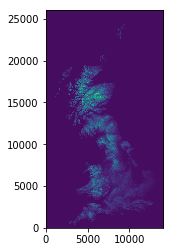

In [4]:
plt.imshow(arr, origin='lower')

To bin the data to a lower resolution, we can read in terr-50.npy

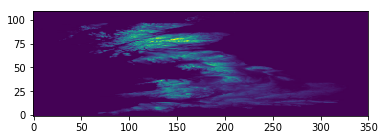

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Binning factors in x- and y-directions
BX, BY = 40, 200

# Load the terrain array; with regret, chop off the Orkneys and Shetland.
arr = np.load('terr-50.npy')[:22000,:]
ny, nx = arr.shape

def rebin(arr, new_shape):
    """Rebin 2D array arr to shape new_shape by averaging."""

    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

arr = rebin(arr, (ny // BY, nx // BX))
np.save('terr-50-binned.npy', arr)

plt.imshow(arr, origin='lower')

The resulting file is available as `terr-50-binned.npy` and is now smaller.

Finally:

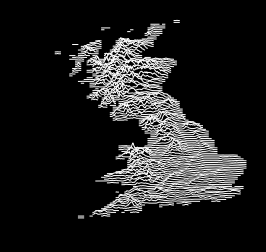

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Load the binned terrain array.
arr = np.load('terr-50-binned.npy')
# Set the sea to NaN
arr[arr==0] = np.nan
ny, nx = arr.shape

fig, ax = plt.subplots(facecolor='k')
x = np.arange(nx)

# DROW controls the spacing between rows: higher will reduce the vertical
# resolution.
DROW = 150

# Draw the terrain in a series of white lines from left to right:
for i, row in enumerate(arr):
    offset = i * DROW
    zorder = (ny*DROW - offset+1)*2
    ax.plot(x, row+offset, 'w', zorder=zorder, lw=1)
    ax.fill_between(x, row+offset, offset, facecolor='k', lw=0,
                    zorder=zorder-1)

# Tweak the appearance to get the aspect ratio right and to remove the axes.
sc = nx/ny
ax.set_aspect(sc/DROW)
ax.axis('off')

# We need to specify the figure facecolour again in savefig.
plt.savefig('os-uk.png', facecolor=fig.get_facecolor(), edgecolor='none')